   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

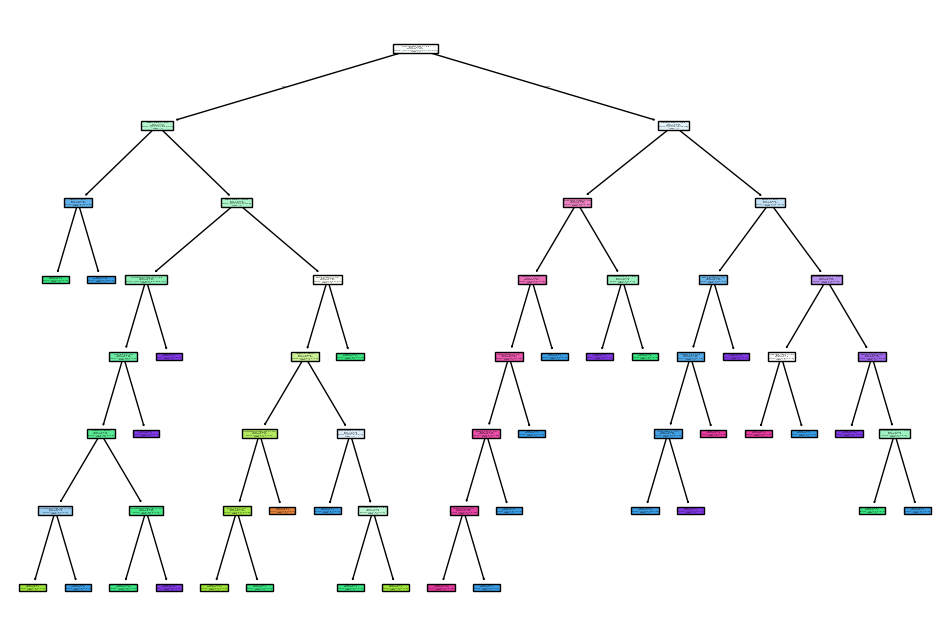

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Step 1: Load the Automobile dataset
data = pd.read_csv("/content/Automobile_data.csv")

# Step 2: Check the data structure and identify the target column
print(data.head())  # To see the first few rows
print(data.columns)  # To see all column names

# Step 3: Preprocess the data
# Assuming one column is the target and the rest are features; adjust as necessary
# For this example, let's say we are predicting the 'symboling' column
# Replace 'symboling' with the actual target column if different
X = data.drop(columns=['symboling'])  # Features
y = data['symboling']  # Target variable

# If there are non-numeric columns, convert them to numeric or drop them
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Step 6: Predict on test set
y_pred = classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 8: Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 9: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(classifier, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.show()
